# <font color="blue">Supply Chain Optimization for FMCG Company</font>

## <font color="blue">Introduction</font>
The project focuses on optimizing the supply chain for a FMCG company that recently entered the instant noodles business. The company faces a challenge of demand-supply mismatch, leading to increased inventory costs and financial losses. The objective is to build a predictive model that can determine the optimal product weight to be shipped from each warehouse in the country. Key features of the data base include warehouse details, geographic factors and historical performance indicators. For the purpose of predicting and improving different aspects of supply chain management, these parameters shall be used to create and evaluate regression models such as Linear Regression, Decision Tree, Random Forest,Gradient Boosting. The project begins with data preprocessing and feature engineering, and then, proceeds to model building, followed by in-depth exploration through Exploratory Data Analysis (EDA). The objective is ultimately to increase the efficiency of the supply chain, in particular by discovering helpful information, identifying feature relationships and enhancing business continuity.snamics.


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <font color="blue">Data Preparation</font>

In [2]:
data1=pd.read_csv("supply_train.csv")#training Dataset
data2=pd.read_csv("supply_test.csv")#testing Dataset

In [3]:
data1.head(5)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
data2.head(5)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [5]:
data1.shape

(16620, 25)

In [6]:
data2.shape

(5529, 25)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [9]:
data1.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [10]:
data2.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.00000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,19385.00000,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,1596.22915,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,16621.00000,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,18003.00000,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,19385.00000,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,20767.00000,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,22149.00000,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [11]:
for i in data1.columns:
    print(f'{i}: {data1[i].nunique()}')

Unnamed: 0: 16620
Ware_house_ID: 16620
WH_Manager_ID: 16620
Location_type: 2
WH_capacity_size: 3
zone: 4
WH_regional_zone: 6
num_refill_req_l3m: 9
transport_issue_l1y: 6
Competitor_in_mkt: 12
retail_shop_num: 4356
wh_owner_type: 2
distributor_num: 56
flood_impacted: 2
flood_proof: 2
electric_supply: 2
dist_from_hub: 217
workers_num: 60
wh_est_year: 28
storage_issue_reported_l3m: 37
temp_reg_mach: 2
approved_wh_govt_certificate: 5
wh_breakdown_l3m: 7
govt_check_l3m: 32
product_wg_ton: 4248


## <font color="blue">Handling Missing Values</font>

In [12]:
# check missing values
data1.isnull().sum() 

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [13]:
data2.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [14]:
#Replacing null values with median
new_median1=data1["wh_est_year"].median()
data1["wh_est_year"].fillna(new_median1,inplace=True)
new_median2=data2["wh_est_year"].median()
data2["wh_est_year"].fillna(new_median2,inplace=True)

In [15]:
data1['workers_num'].fillna(data1['workers_num'].median(), inplace=True)
data2['workers_num'].fillna(data2['workers_num'].median(), inplace=True)

In [16]:
data1['approved_wh_govt_certificate'].fillna('NIL', inplace=True)  
data2['approved_wh_govt_certificate'].fillna('NIL', inplace=True)  

In [17]:
data1.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [18]:
data2.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [19]:
data1.duplicated().sum()

0

In [20]:
data2.duplicated().sum()

0

## <font color="blue">Exploratory Data Analysis (EDA)</font>

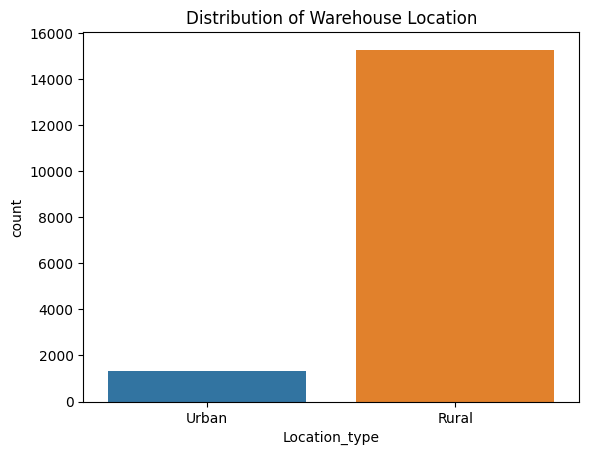

In [21]:
sns.countplot(x='Location_type',data=data1)
plt.title("Distribution of Warehouse Location")
plt.show()

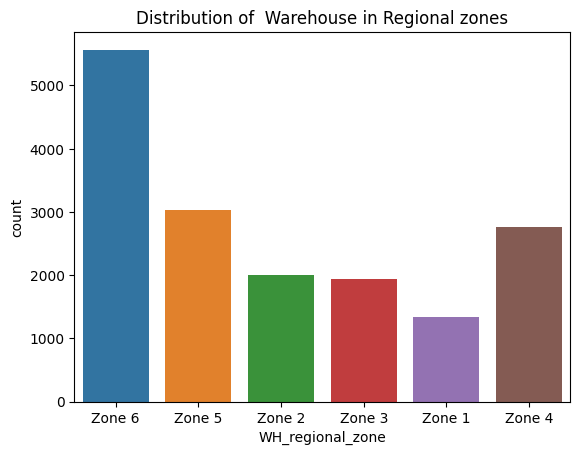

In [22]:
sns.countplot(x='WH_regional_zone',data=data1)
plt.title("Distribution of  Warehouse in Regional zones")
plt.show()

<Axes: xlabel='wh_est_year', ylabel='wh_breakdown_l3m'>

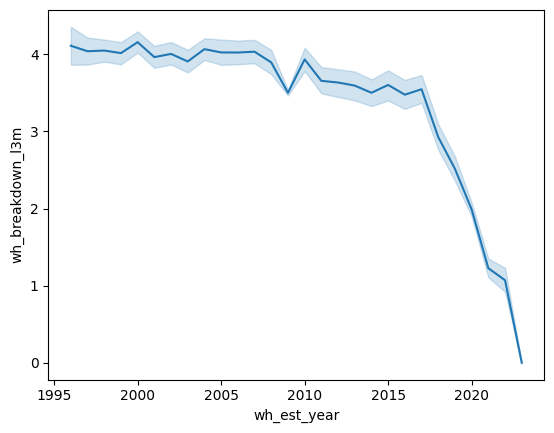

In [23]:
sns.lineplot(data=data1, x="wh_est_year", y="wh_breakdown_l3m")

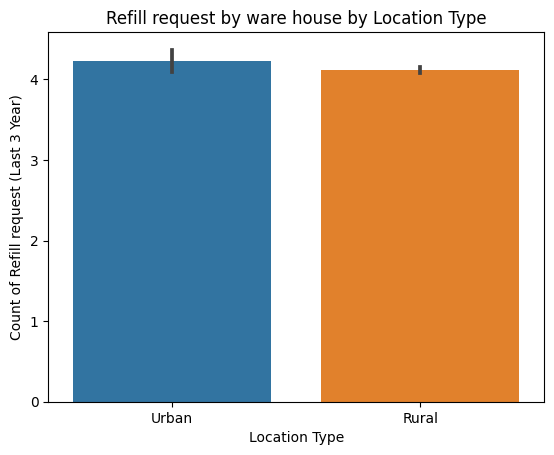

In [24]:
sns.barplot(data=data1, x='Location_type', y='num_refill_req_l3m')
plt.title('Refill request by ware house by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count of Refill request (Last 3 Year)')
plt.show()

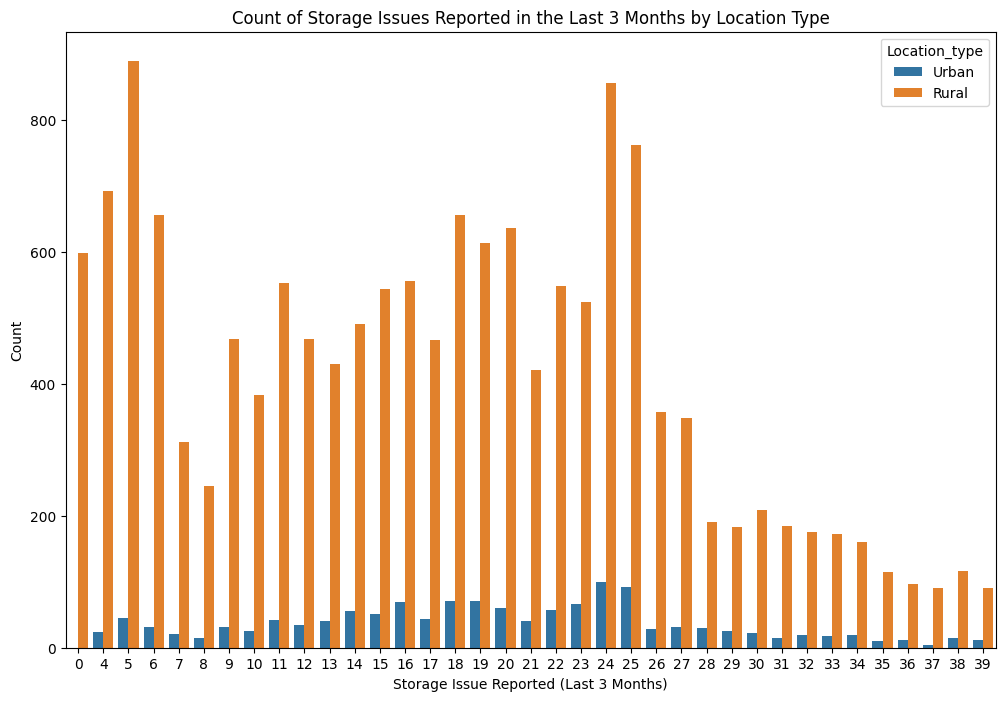

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x=data1['storage_issue_reported_l3m'],hue=data1['Location_type'])
plt.title('Count of Storage Issues Reported in the Last 3 Months by Location Type')
plt.xlabel('Storage Issue Reported (Last 3 Months)')
plt.ylabel('Count')
plt.show()

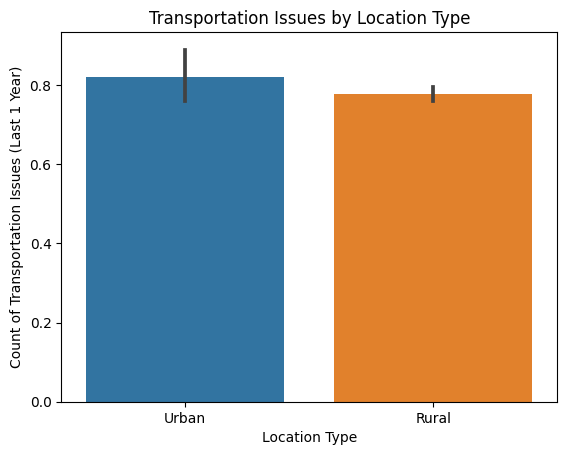

In [26]:
sns.barplot(data=data1, x='Location_type', y='transport_issue_l1y')
plt.title('Transportation Issues by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count of Transportation Issues (Last 1 Year)')
plt.show()

#EDA Analysis
North zone have more number of warehouse,so we can assume that the supply is more in North zone
Most of the warehouse is located in Rural areas.
Warehouses tend to break down more often as they age. Warehouse managers should be more proactive in maintaining their warehouses and have a plan in place to deal with breakdowns when they happen.
The graph shows that compared to urban area rural area have more storage issues reported.
The graph shows that the transportation issues is slightly higher in urban areas than in rural areas.

## <font color="blue">Encoding Categorical Features</font>

In [27]:
#dropping unnamed column
data1=data1.drop('Unnamed: 0',axis=1)
data1.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2009.0,4,0,A,3,17,5074


In [28]:
#dropping unnamed column
data2=data2.drop('Unnamed: 0',axis=1)
data2.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,5856,...,1,79,31.0,2019.0,5,1,C,2,24,6075


In [29]:
#Label Encoding Categorical variable in training data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['Location_type']=le.fit_transform(data1['Location_type'])
data1['WH_capacity_size']=le.fit_transform(data1['WH_capacity_size'])
data1['approved_wh_govt_certificate']=le.fit_transform(data1['approved_wh_govt_certificate'])
data1["zone"]=le.fit_transform(data1["zone"])
data1["WH_regional_zone"]=le.fit_transform(data1["WH_regional_zone"])
data1["wh_owner_type"]=le.fit_transform(data1["wh_owner_type"])
data1.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,1,2,3,5,3,1,2,4651,...,1,91,29.0,2009.0,13,0,0,5,15,17115
1,WH_100001,EID_50001,0,0,1,4,0,0,4,6217,...,1,210,31.0,2009.0,4,0,0,3,17,5074
2,WH_100002,EID_50002,0,1,2,1,1,0,4,4306,...,0,161,37.0,2009.0,17,0,0,6,22,23137
3,WH_100003,EID_50003,0,1,1,2,7,4,2,6000,...,0,103,21.0,2009.0,17,1,1,3,27,22115
4,WH_100004,EID_50004,0,0,1,4,3,1,2,4740,...,1,112,25.0,2009.0,18,0,4,6,24,24071


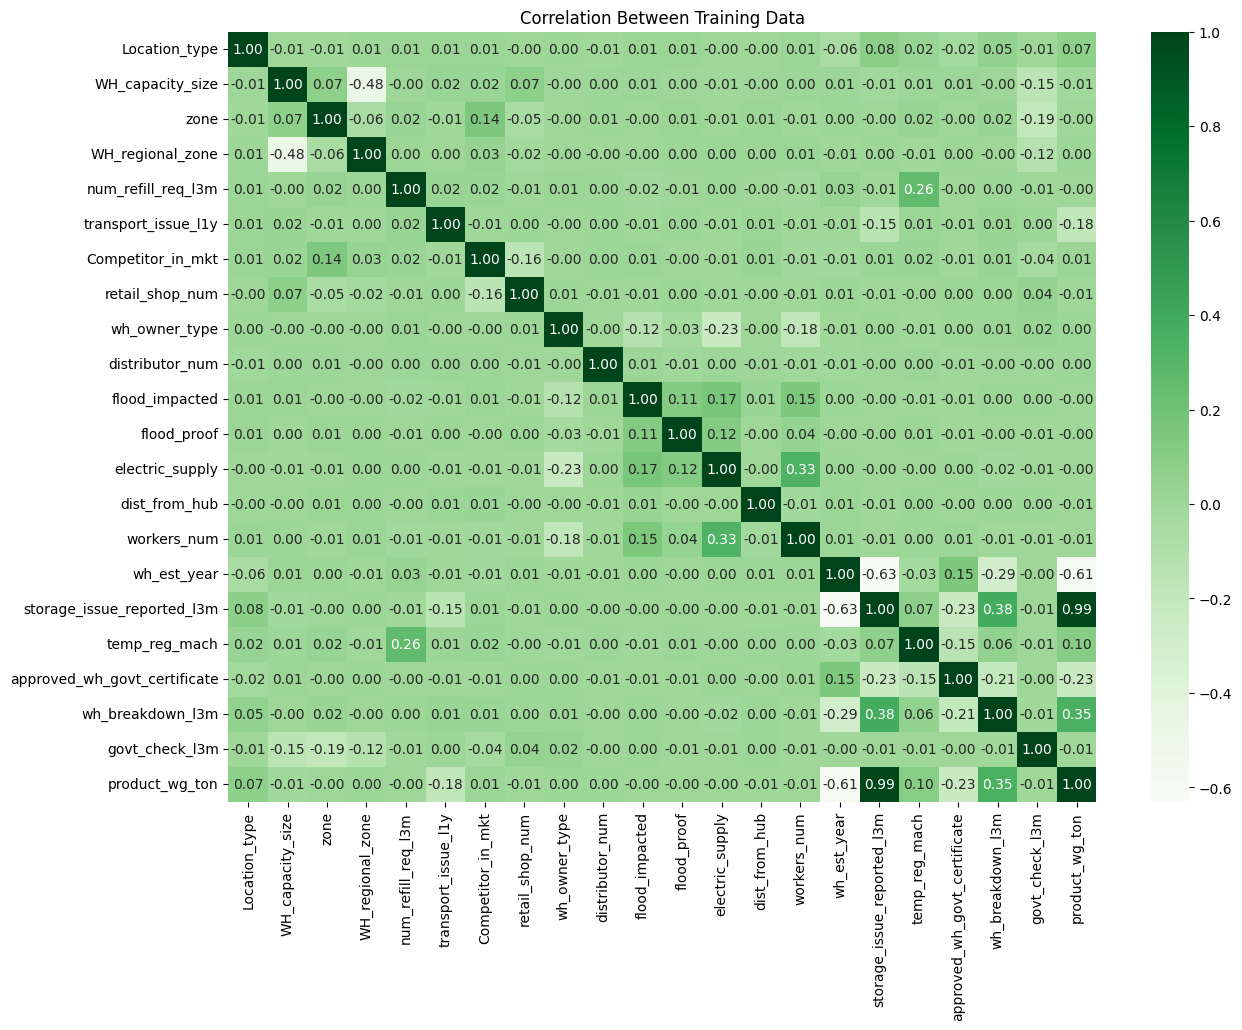

In [30]:
#Data Analysis
numeric_data1 = data1.select_dtypes(include=['number'])
corr=numeric_data1.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr,annot=True,cmap = 'Greens',fmt='.2f')
plt.title('Correlation Between Training Data')
plt.show()

The observations from this correlation matrix is that variables that have strong positive correlation(as one variable increases, the other variable tends to increase proportionally) is storage_issue_reported_l3m .The variables that have moderate positive correlation(as one variable increases, the other variable also increases moderately) are num_refill_req_l3m .The variables that have a strong negative correlation(as one variable increases, the other variable tends to decrease significantly) are wh_est_year. The variables that have weak correlation are Ware_house_ID, WH_Manager_ID, Location_type, WH_capacity_size, zone, WH_regional_zone, num_refill_req_l3m, transport_issue_l1y, Competitor_in_mkt, retail_shop_num ,wh_owner_type, distributor_num, flood_impacted, flood_proof, electric_supply, dist_from_hub, workers_num,temp_reg_mach, approved_wh_govt_certificate, govt_check_l3m.

In [31]:
#changing Warehouse id to numeric value
def num(d):
    num = ''.join(filter(str.isdigit, d))
    return int(num)
data1['Ware_house_ID']=data1['Ware_house_ID'].apply(num)

In [32]:
#Removing less relevant features
data1=data1.drop(['WH_Manager_ID','zone','wh_owner_type'],axis=1)

In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  int64  
 1   Location_type                 16620 non-null  int32  
 2   WH_capacity_size              16620 non-null  int32  
 3   WH_regional_zone              16620 non-null  int32  
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   distributor_num               16620 non-null  int64  
 9   flood_impacted                16620 non-null  int64  
 10  flood_proof                   16620 non-null  int64  
 11  electric_supply               16620 non-null  int64  
 12  dist_from_hub                 16620 non-null  int64  
 13  w

In [34]:
#Label Encoding Categorical variable in testing data
le=LabelEncoder()
data2['Location_type']=le.fit_transform(data2['Location_type'])
data2['WH_capacity_size']=le.fit_transform(data2['WH_capacity_size'])
data2['approved_wh_govt_certificate']=le.fit_transform(data2['approved_wh_govt_certificate'])
data2["zone"]=le.fit_transform(data2["zone"])
data2["WH_regional_zone"]=le.fit_transform(data2["WH_regional_zone"])
data2["wh_owner_type"]=le.fit_transform(data2["wh_owner_type"])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 5529 non-null   object 
 1   WH_Manager_ID                 5529 non-null   object 
 2   Location_type                 5529 non-null   int32  
 3   WH_capacity_size              5529 non-null   int32  
 4   zone                          5529 non-null   int32  
 5   WH_regional_zone              5529 non-null   int32  
 6   num_refill_req_l3m            5529 non-null   int64  
 7   transport_issue_l1y           5529 non-null   int64  
 8   Competitor_in_mkt             5529 non-null   int64  
 9   retail_shop_num               5529 non-null   int64  
 10  wh_owner_type                 5529 non-null   int32  
 11  distributor_num               5529 non-null   int64  
 12  flood_impacted                5529 non-null   int64  
 13  flo

In [35]:
data2['Ware_house_ID']=data2['Ware_house_ID'].apply(num)

In [36]:
#Removing less relevant features
data2=data2.drop(['WH_Manager_ID','zone','wh_owner_type'],axis=1)

In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 5529 non-null   int64  
 1   Location_type                 5529 non-null   int32  
 2   WH_capacity_size              5529 non-null   int32  
 3   WH_regional_zone              5529 non-null   int32  
 4   num_refill_req_l3m            5529 non-null   int64  
 5   transport_issue_l1y           5529 non-null   int64  
 6   Competitor_in_mkt             5529 non-null   int64  
 7   retail_shop_num               5529 non-null   int64  
 8   distributor_num               5529 non-null   int64  
 9   flood_impacted                5529 non-null   int64  
 10  flood_proof                   5529 non-null   int64  
 11  electric_supply               5529 non-null   int64  
 12  dist_from_hub                 5529 non-null   int64  
 13  wor

## <font color="blue">Model Selection and Training</font>

In [43]:
X_train=data1.drop('product_wg_ton',axis=1)
y_train=data1['product_wg_ton']
X_test=data2.drop('product_wg_ton',axis=1)
y_test=data2['product_wg_ton']

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## <font color="blue">Linear Regression</font>

In [40]:
lr=LinearRegression() # object creation
lr.fit(X_train,y_train) # model building
lr_pred=lr.predict(X_test)
score=r2_score(lr_pred,y_test)
mse=mean_squared_error(lr_pred,y_test)
msa=mean_absolute_error(lr_pred,y_test)
print("Evaluation Result \n")
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",score*100,'\n')

Evaluation Result 

mean square error =  3092565.4313959545
mean absolute error =  1301.8291725261297
r2 score =  97.67389231239801 



## <font color="blue">Decision Tree</font>

In [45]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred=dt.predict(X_test)
dt_pred
score=r2_score(dt_pred,y_test)
mse=mean_squared_error(dt_pred,y_test)
msa=mean_absolute_error(dt_pred,y_test)
print("Evaluation Result \n")
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",score*100,'\n')

Evaluation Result 

mean square error =  1693001.426659432
mean absolute error =  894.1580756013745
r2 score =  98.75892375984866 



## <font color="blue">Random Forest Regressor</font>

In [46]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
rf_pred
score=r2_score(rf_pred,y_test)
mse=mean_squared_error(rf_pred,y_test)
msa=mean_absolute_error(rf_pred,y_test)
print("Evaluation Result \n")
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",score*100,'\n')

Evaluation Result 

mean square error =  872216.5281215954
mean absolute error =  705.6777301501176
r2 score =  99.35757647352548 



## <font color="blue">Gradient Booster</font>

In [47]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred=gb.predict(X_test)
gb_pred
score=r2_score(gb_pred,y_test)
mse=mean_squared_error(gb_pred,y_test)
msa=mean_absolute_error(gb_pred,y_test)
print("Evaluation Result \n")
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",score*100,'\n')

Evaluation Result 

mean square error =  835803.9341093372
mean absolute error =  703.0558471882695
r2 score =  99.3866748977754 



## <font color="blue">SVM</font>

In [49]:
svm=SVR(kernel='linear') 
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_pred
score=r2_score(svm_pred,y_test)
mse=mean_squared_error(svm_pred,y_test)
msa=mean_absolute_error(svm_pred,y_test)
print("Evaluation Result \n")
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",score*100,'\n')

Evaluation Result 

mean square error =  7713164.1352505535
mean absolute error =  2152.868699810262
r2 score =  94.14893464299519 



## <font color="blue">Conclusion</font>
In conclusion, the supply chain optimization challenge for the FMCG company has been successfully solved by this data science project.Random Forest and Gradient Boosting Regressors were the best performing models among those evaluated. They had lower mean squared error and mean absolute error, which means they were better at predicting the target variable. The R² scores for both models were close to 99%, which means they fit the data well. Therefore, for this particular dataset, the Gradient Boosting Regressor is the best choice because it gives the most accurate and precise predictions of the target variable.
